# Decision Trees
We'll start by building a decision tree and examining how it works

In [6]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [5]:
# Where to save the figures
import os 

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

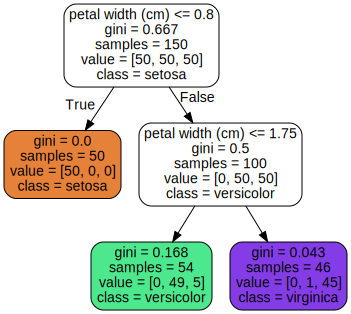

In [7]:
from sklearn.tree import export_graphviz
from graphviz import Source

export_graphviz(
    tree_clf, 
    out_file= os.path.join(IMAGES_PATH, "iris_tree.dot"),
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

By looking at the diagram above we can see how the decision tree makes a prediction. 

Suppose we find an iris flower with petal width <= 0.8cm. The first node evaluates to true, we move to a leaf node and find our class.

However if we find a flower with petal width >0.8 we move to the next node on the right. It is not a leaf node so we ask another question: is the petal width <= 1.75cm? If so we classify it as versicolor otherwise as virginica.

*Note*: One of the advantages of decision trees is that they need little to no data preparation, feature scaling or centering.

You'll note that each node has various attributes. Here's their definition

**samples:** How many training instances it applies to. E.g. 100 instances have petal width >= 0.8cm (depth 1, right) and of those 54 have petal width <= 1.75cm and 46 greater than that.

**value:** How many training instances of each class this node applies to. E.g. bottom right (purple) node applies to 0 *iris setosa*, 1 *iris versicolor* and *45 iris virginica*.

The **gini** attribute measures how *pure* a node is. A node is pure (gini=0) if all training instances it applies to belong to the same class.

For example the orange node has gini=0 because all training instances are *iris setosa* instances. More formally, the Gini impurity is defined as

$$ G_i = 1 - \sum^{n}_{k=1}p_{i,k}^2$$

Where $p_{i,k}$ is the ratio of class $k$ instances among the training instances in the $i^{th}$ node

For example, the green node has gini score equal to
$$ 1 - (0/54)^2 - (49/54)^2 - (5/54)^2 \approx 0.168 $$ 

In [9]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

<Figure size 800x400 with 1 Axes>

To do: re-create it in plotly!